In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
# current directory
cwd = os.getcwd()
print(cwd)

C:\Users\hp


In [3]:
# path to images
path = cwd+'/Blood Cell Type/'

In [4]:
# animal categories
categories = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE','NEUTROPHIL']

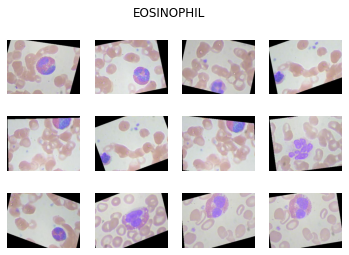

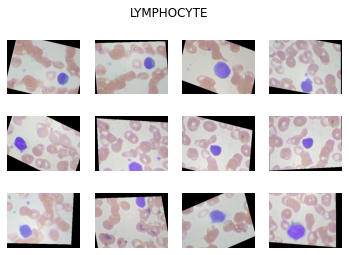

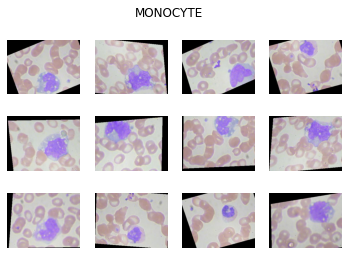

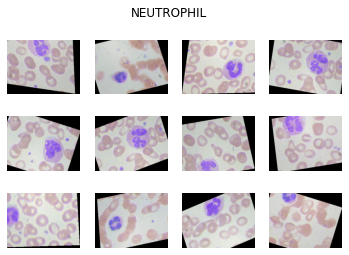

In [5]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


In [6]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

EOSINOPHIL  => height min :  240 width min :  320
EOSINOPHIL  => height max :  240 width max :  320
LYMPHOCYTE  => height min :  240 width min :  320
LYMPHOCYTE  => height max :  240 width max :  320
MONOCYTE  => height min :  240 width min :  320
MONOCYTE  => height max :  240 width max :  320
NEUTROPHIL  => height min :  240 width min :  320
NEUTROPHIL  => height max :  240 width max :  320


In [7]:
# 3. Preprocess data and label inputs

In [8]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['C:\\Users\\hp/Blood Cell Type/NEUTROPHIL/_127_572.jpeg', 3], ['C:\\Users\\hp/Blood Cell Type/EOSINOPHIL/_65_1381.jpeg', 0], ['C:\\Users\\hp/Blood Cell Type/NEUTROPHIL/_82_9576.jpeg', 3], ['C:\\Users\\hp/Blood Cell Type/LYMPHOCYTE/_14_2562.jpeg', 1], ['C:\\Users\\hp/Blood Cell Type/NEUTROPHIL/_43_304.jpeg', 3], ['C:\\Users\\hp/Blood Cell Type/MONOCYTE/_5_8872.jpeg', 2], ['C:\\Users\\hp/Blood Cell Type/EOSINOPHIL/_24_8025.jpeg', 0], ['C:\\Users\\hp/Blood Cell Type/NEUTROPHIL/_27_2382.jpeg', 3], ['C:\\Users\\hp/Blood Cell Type/MONOCYTE/_2_7942.jpeg', 2], ['C:\\Users\\hp/Blood Cell Type/EOSINOPHIL/_65_8220.jpeg', 0]]


In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float") 
# mean_image = np.mean(data, axis=0)
# data -= mean_image

labels = np.array(labels)

In [10]:
print(data.shape, labels.shape)

(12436, 32, 55, 3) (12436,)


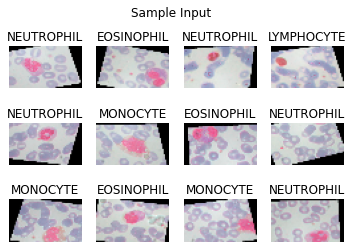

In [11]:
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [12]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)


In [13]:
# Preprocess class labels


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(9948, 32, 55, 3)
(2488, 32, 55, 3)
(9948,)
(2488,)


In [14]:
trainX= np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))

In [15]:
# Preprocess class labels


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(9948, 5280)
(2488, 5280)
(9948,)
(2488,)


In [16]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(trainX, trainY)

NuSVC()

In [17]:
# Preprocess class labels



print(testX.shape)
print(testY.shape)

(2488, 5280)
(2488,)


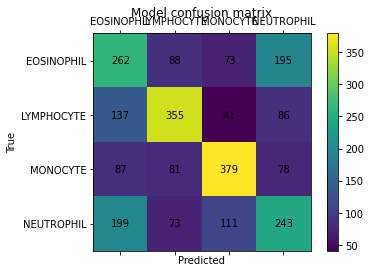

Accuracy : 49.80%


In [23]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(testX)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(4):
    for j in range(4):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

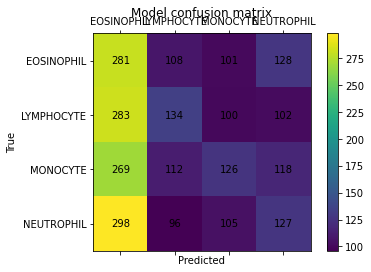

Accuracy : 26.85%


In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainY)
pred = neigh.predict(testX)

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(4):
    for j in range(4):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))